# Detecção de fraudes em cartão de crédito em Python

As fraudes em cartões de crédito são um problema comum e crescente em todo o mundo. Os cartões de crédito são uma forma conveniente e amplamente utilizada de pagamento, mas também são um alvo fácil para fraudadores que buscam se aproveitar de informações sensíveis dos usuários. A fraude em cartões de crédito pode ocorrer de várias formas, incluindo roubo de informações de cartões, clonagem, phishing, skimming e outras táticas fraudulentas.

A detecção e prevenção de fraudes em cartões de crédito é uma prioridade para instituições financeiras e usuários de cartões, já que essas atividades fraudulentas podem levar a perdas financeiras significativas e danos à reputação. As perdas financeiras incluem tanto os gastos fraudulentos com os cartões de crédito quanto os custos de investigação e reparação dos danos causados. Além disso, as fraudes em cartões de crédito podem causar grande impacto emocional aos usuários, que muitas vezes se sentem invadidos e inseguros após serem vítimas desses golpes.

Por isso, é importante que as instituições financeiras e os usuários de cartões tomem medidas preventivas para minimizar o risco de fraude. Isso inclui o uso de tecnologias avançadas de segurança, a implementação de medidas de autenticação robustas e a adoção de práticas seguras de gerenciamento de informações. Além disso, é essencial desenvolver soluções eficazes de análise de dados para detectar e prevenir fraudes em cartões de crédito, e é nesse contexto que a tecnologia de aprendizado de máquina e a programação Python podem desempenhar um papel fundamental.

# Obtenção dos Dados
O conjunto de dados contém transações feitas por cartões de crédito em setembro de 2013 por titulares de cartões europeus. Este conjunto de dados apresenta transações ocorridas em dois dias, onde temos 492 fraudes em 284.807 transações. 
Para esta análise, será baixado apenas o seguinte arquivo: 
`creditcard.csv` dados disponibilizados no [Kaggle]('https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud').

In [27]:
# instalar a biblioteca scikit-plot
!pip install -q scikit-plot

In [29]:
# importar os pacotes necessarios
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

# filtrar mensagens de warning
import warnings
warnings.filterwarnings('ignore')

# importando scikit-learn para criar o modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler

In [31]:
df = pd.read_csv('creditcard.csv')

## Análise Exploratória dos Dados 
O objetivo desta etapa é alcançar um entendimento geral de como os dados estão estruturados.

Por conta de confidencialidade e preservação das estratégias de mercado, os nomes das variáveis foram substituídos por "V1" até "V28". 

 **Dicionário das variáveis** 

`Time` - segundos decorridos desde a primeira transação;

`Amount` - valor da transação;

`Class` - variável alvo, na qual:

* 0: indica transação normal ou regular;
* 1: transação fraudulenta.

## Dimensões do dataset e tipos de dados
Examinando as dimensões e entradas do `DataFrame`:

In [52]:
print('Número de transações validas: {}'.format(len(df[df['Class'] == 0])))
print('Número de transações fraudulentas: {}'.format(len(df[df['Class'] == 1])))


Número de transações validas: 284315
Número de transações fraudulentas: 492


In [54]:
# cinco primeiras entradas do DataFrame
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Com exceção de `Time` e `Amount`, as demais features foram descaracterizadas por meio do metodo PCA.


## Resumo Estatístico dos dados
Resumo estatístico por meio do método `describe()`:

In [55]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Apenas na variável `Amount`, vemos uma discrepância aparente. A média de transações financeiras neste conjunto de dados é baixa, com um valor máximo é de € 25.691, 16.

## Valores ausentes
A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

Verificando se há valores ausentes no dataset:

In [56]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

Time      0.0
V16       0.0
Amount    0.0
V28       0.0
V27       0.0
V26       0.0
V25       0.0
V24       0.0
V23       0.0
V22       0.0
V21       0.0
V20       0.0
V19       0.0
V18       0.0
V17       0.0
V15       0.0
V1        0.0
V14       0.0
V13       0.0
V12       0.0
V11       0.0
V10       0.0
V9        0.0
V8        0.0
V7        0.0
V6        0.0
V5        0.0
V4        0.0
V3        0.0
V2        0.0
Class     0.0
dtype: float64

Nenhuma variável apresenta valores ausentes. 

## Verificando o balanceamento

In [57]:
# ver o balanceamento da varíavel 'class'
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Cerca de 284.315 transações foram identificadas como normais, e apenas 492 como fraudulentas.

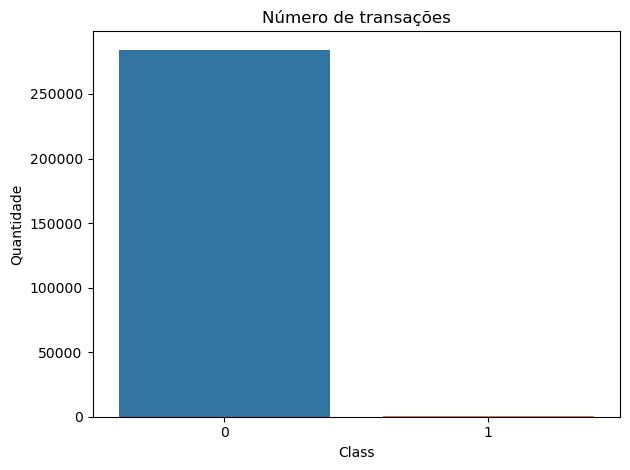

In [58]:
# em termos de gráfico
fig, ax = plt.subplots()

sns.countplot(x='Class', data=df)
ax.set_title('Número de transações');
ax.set_ylabel('Quantidade')

plt.tight_layout()

## Transações ao longo do tempo

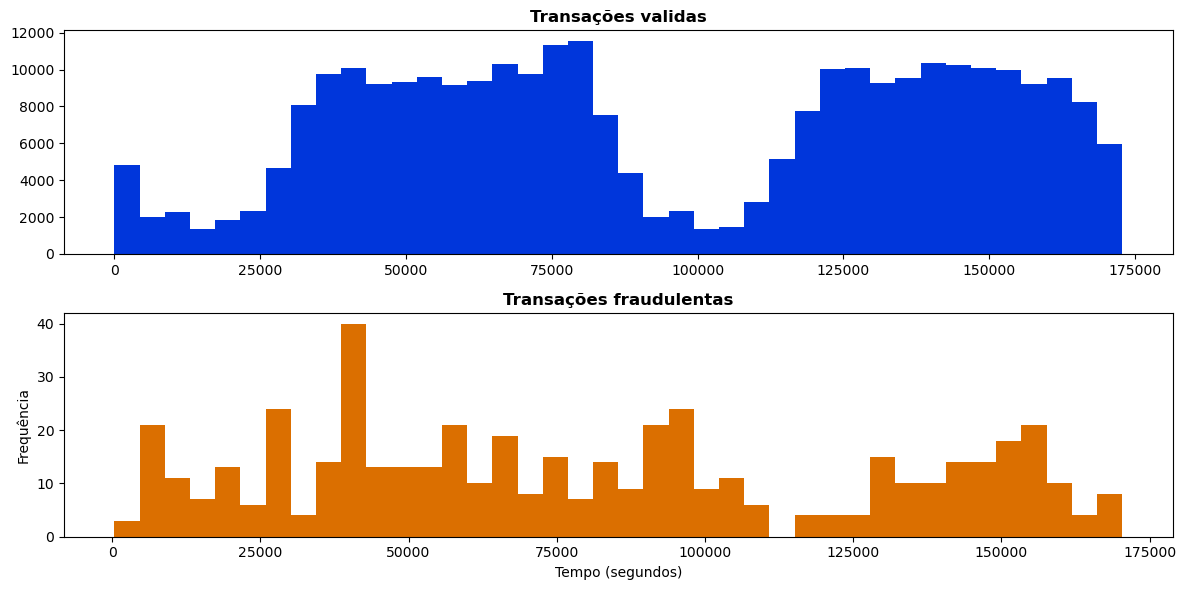

In [60]:
# histograma das transações ao longo do tempo
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

ax1.hist(df.Time[df.Class == 0], bins=40, color='#0036DB')
ax1.set_title('Transações validas',  fontweight="bold")



ax2.hist(df.Time[df.Class == 1], bins=40, color='#DB6F00')
ax2.set_title('Transações fraudulentas', fontweight="bold")
ax2.set_ylabel('Frequência')
ax2.set_xlabel('Tempo (segundos)')

plt.tight_layout()
     

Ao contrário das Fraudulentas, as transações validas de maior frequência ocorreram em intervalos de tempo específicos.

## Frequência dos valores por transação

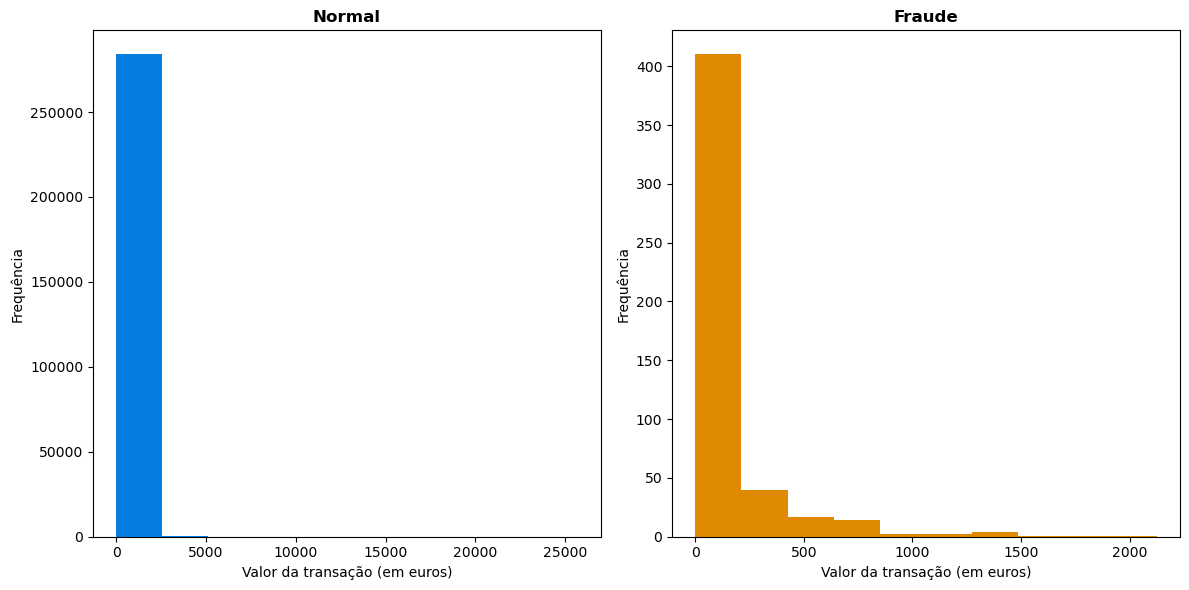

In [61]:
# histograma da frequência dos valores por transação
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.hist(df.Amount[df.Class == 0], bins=10, color='#047DE1');
ax1.set_xlabel('Valor da transação (em euros)')
ax1.set_ylabel('Frequência')
ax1.set_title('Normal', fontweight='bold')

ax2.hist(df.Amount[df.Class == 1], bins=10, color='#E08A04');
ax2.set_xlabel('Valor da transação (em euros)')
ax2.set_ylabel('Frequência')
ax2.set_title('Fraude', fontweight='bold')

fig.tight_layout()
     

Com base nos resultados apresentados, é possível constatar que as transações fraudulentas apresentaram valores mais baixos em comparação às transações normais. Essa diferença pode ser explicada pelo fato de os criminosos desejarem evitar chamar a atenção e despertar suspeitas.

## Gráfico de Densidade

Construiremos os gráficos de densidade, uma ferramenta muito útil para compararmos as distribuições das variáveis em cada classe, facilitando a identificação das mais importantes para detecção de anomalias, no caso, as próprias fraudes.

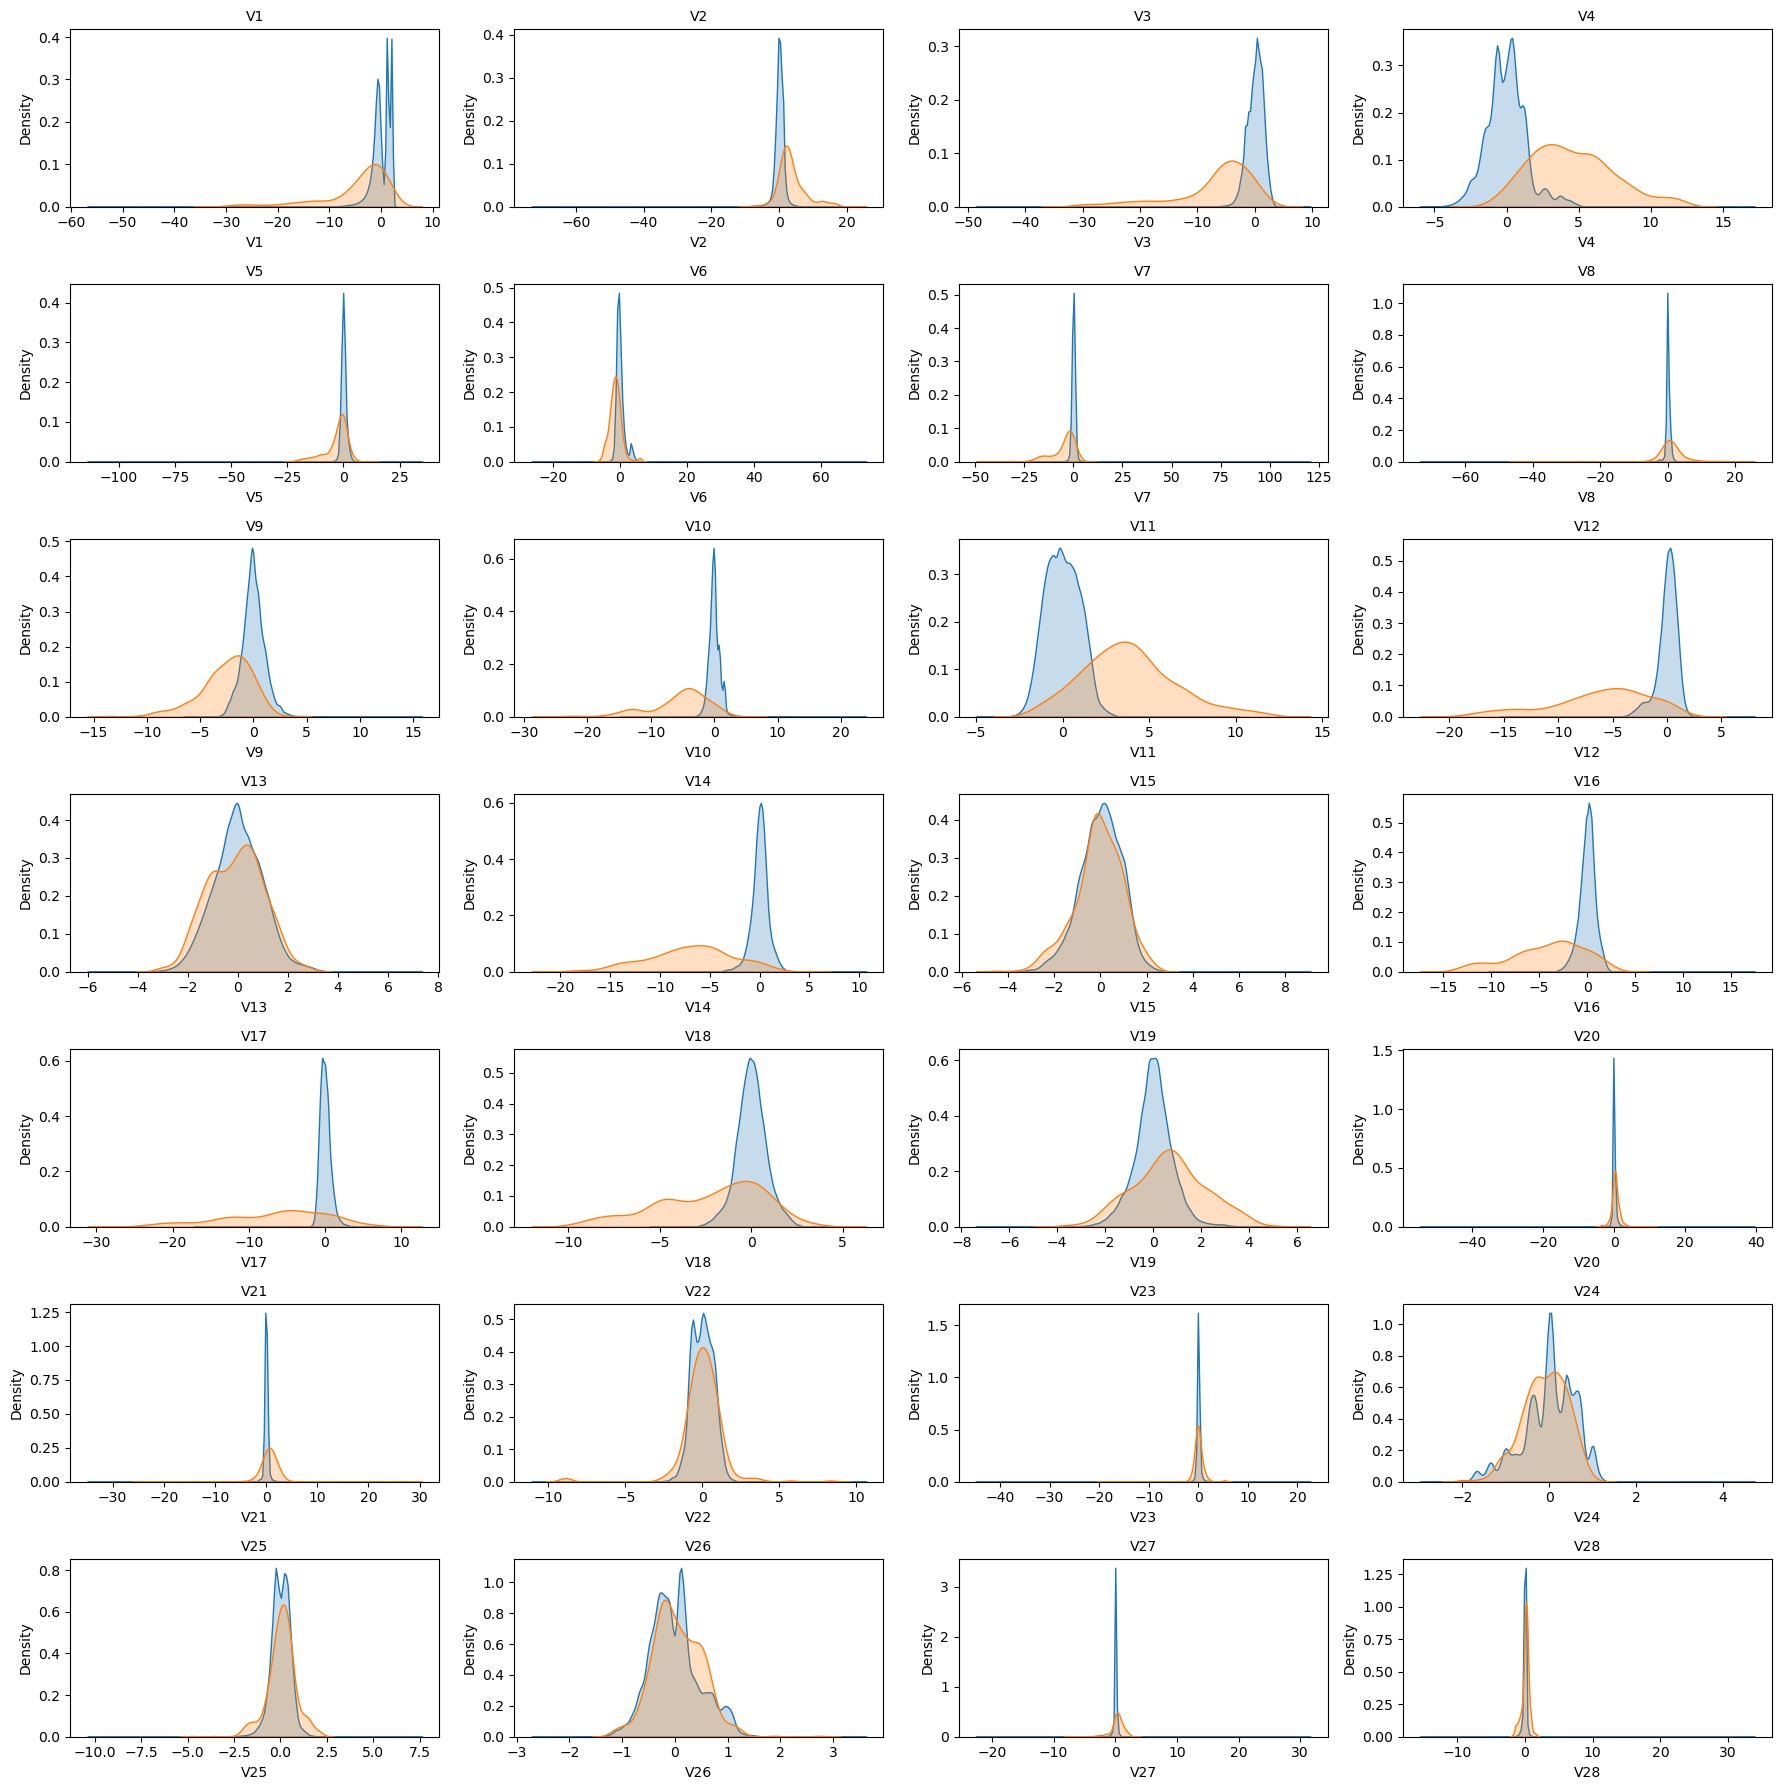

In [62]:
# criando os gráficos de densidade
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(column_names)
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

fig, ax = plt.subplots(7, 4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(df_class_0[col], label="Class 0", shade=True)
    sns.kdeplot(df_class_1[col], label="Class 1", shade=True)
    plt.title(col, fontsize=10)

plt.tight_layout();

Observe que as variáveis V3, V4, V10 e V11 apresentam diferenças significativas, ao passo que V13 e V15 são mais semelhantes.

## Padronização de `Time` e `Amount`

In [63]:
# fazendo uma cópia do df
df_clean = df.copy()

# padronizando as colunas Time e Amount
std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

In [64]:
df_clean.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,2.848070e+05,2.848070e+05
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,0.001727,2.913952e-17,-3.065637e-16
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527,1.000002e+00,1.000002e+00
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,-3.532294e-01,-1.996583e+00
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000,-3.308401e-01,-8.552120e-01
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,-2.652715e-01,-2.131453e-01
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000,-4.471707e-02,9.372174e-01
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000,1.023622e+02,1.642058e+00


Tanto a coluna `std_amount` quanto `std_time` agora estão na mesma escala, com média zero e desvio padrão igual a um, aproximadamente.

## Conjuntos de treino e teste

In [65]:
# separando as variáveis X e y
X = df_clean.drop('Class', axis=1)
y = df_clean['Class']

# dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.15, stratify=y, shuffle=True)

## Balanceamento dos dados

In [66]:
# aplicando a técnica de undersampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# verificando balanceamento das classes
print(pd.Series(y_rus).value_counts())

# comparando as dimensões (antes e depois)
print("\nDimensões de y_train antes do balanceamento:", y_train.shape)
print("Dimensões de y_train depois do balanceamento:", y_rus.shape)

print("\nDimensões de X_train antes do balanceamento:", X_train.shape)
print("Dimensões de X_train depois do balanceamento:", X_rus.shape)

0    418
1    418
Name: Class, dtype: int64

Dimensões de y_train antes do balanceamento: (242085,)
Dimensões de y_train depois do balanceamento: (836,)

Dimensões de X_train antes do balanceamento: (242085, 30)
Dimensões de X_train depois do balanceamento: (836, 30)


Observe que a discrepância inicial não existe mais, graças ao balanceamento que reduziu as dimensões de `X_train` e `y_train` de 242 mil entradas para 836. Agora, as duas classes têm o mesmo peso.

## Matriz de correlação

Text(0.5, 1.0, 'Dados balanceados')

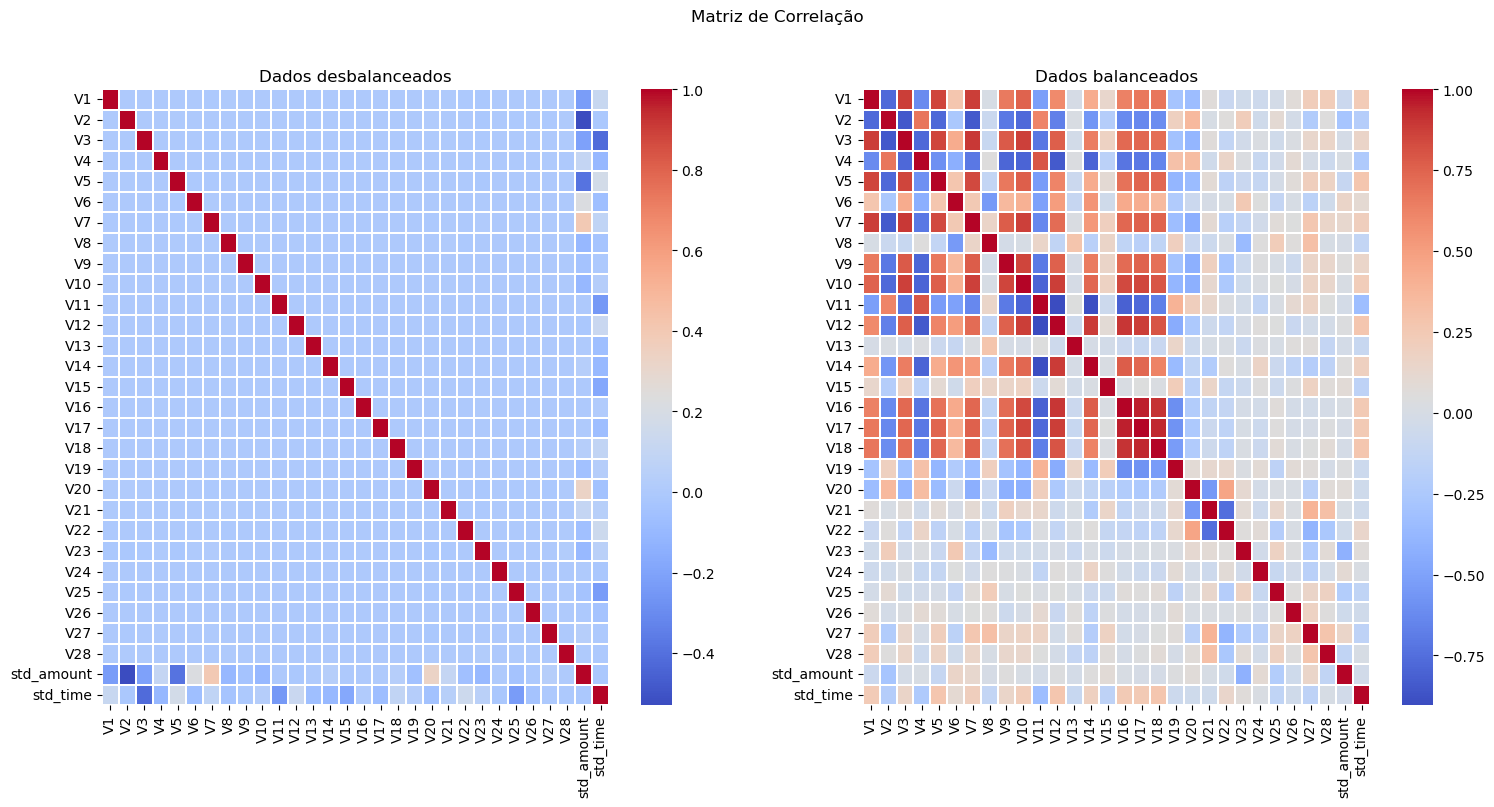

In [67]:
# plotando a matriz de correlação
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax1)
ax1.set_title('Dados desbalanceados')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax2)
ax2.set_title('Dados balanceados')
     

Facilmente observamos que, antes do balanceamento, a matriz de correlação não trazia nenhuma informação relevante, o que já é bem diferente do gráfico à direita.